# ✅ Import necessary libraries

In [92]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# ✅ Load the dataset


In [93]:
df = pd.read_csv("Mobile_Device.csv")

# ✅ Drop missing values

In [94]:
df.dropna(inplace=True)

# ✅ Encode categorical features

In [95]:
label_cols = ['Gender', 'Operating System']
onehot_cols = ['Device Model']


## Apply Label Encoding to binary categorical columns

In [96]:
label_encoders = {col: LabelEncoder() for col in label_cols}
for col in label_cols:
    df[col] = label_encoders[col].fit_transform(df[col])

# ✅ Define preprocessing steps

### OneHotEncoder for 'Device Model' and StandardScaler for numerical features

In [97]:
preprocessor = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(drop='first'), ['Device Model']),
    ('scale', StandardScaler(), ['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Age'])
], remainder='passthrough')

# ✅ Split the data into training and validation sets

In [98]:
X = df.drop('User Behavior Class', axis=1)
y = df['User Behavior Class']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
print(X_train.columns.tolist())

['User ID', 'Device Model', 'Operating System', 'App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 'Number of Apps Installed', 'Data Usage (MB/day)', 'Age', 'Gender']


# ✅ Logistic Regression model

In [100]:
log_pipeline = Pipeline([
    ('prep', preprocessor),
    ('clf', LogisticRegression(max_iter=1000))
])

# Fit the model on training data
log_pipeline.fit(X_train, y_train)

# Predict on validation data
y_pred_log = log_pipeline.predict(X_val)

# Print evaluation results
print("🔹 Logistic Regression Results")
print(classification_report(y_val, y_pred_log))


🔹 Logistic Regression Results
              precision    recall  f1-score   support

           1       1.00      0.85      0.92        27
           2       0.75      0.83      0.79        29
           3       0.73      0.79      0.76        34
           4       0.85      0.81      0.83        27
           5       1.00      0.96      0.98        23

    accuracy                           0.84       140
   macro avg       0.87      0.85      0.86       140
weighted avg       0.85      0.84      0.85       140



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### ✅ K-Nearest Neighbors model with GridSearchCV for tuning

In [101]:
knn_pipeline = Pipeline([
    ('prep', preprocessor),
    ('clf', KNeighborsClassifier())
])
param_grid = {'clf__n_neighbors': [1, 3, 5, 7]}
grid_knn = GridSearchCV(knn_pipeline, param_grid, cv=5)
grid_knn.fit(X_train, y_train)
y_pred_knn = grid_knn.predict(X_val)
print("🔹 KNN Results (Best Params:", grid_knn.best_params_, ")")
print(classification_report(y_val, y_pred_knn))

🔹 KNN Results (Best Params: {'clf__n_neighbors': 3} )
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        29
           3       0.94      1.00      0.97        34
           4       1.00      0.93      0.96        27
           5       1.00      1.00      1.00        23

    accuracy                           0.99       140
   macro avg       0.99      0.99      0.99       140
weighted avg       0.99      0.99      0.99       140



### ✅ Decision Tree model with depth control to avoid overfitting

In [102]:
tree_pipeline = Pipeline([
    ('prep', preprocessor),
    ('clf', DecisionTreeClassifier(max_depth=5, min_samples_split=10))
])
tree_pipeline.fit(X_train, y_train)
y_pred_tree = tree_pipeline.predict(X_val)
print("🔹 Decision Tree Results")
print(classification_report(y_val, y_pred_tree))


🔹 Decision Tree Results
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        23

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140




# ✅ Random Forest model with tuned parameters

In [103]:
rf_pipeline = Pipeline([
    ('prep', preprocessor),
    ('clf', RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42))
])
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_val)
print("🔹 Random Forest Results")
print(classification_report(y_val, y_pred_rf))



🔹 Random Forest Results
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        23

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



# EDA

#  Distribution of Target Variable (User Behavior Class)

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt


rf_pipeline = Pipeline([
    ('prep', preprocessor),
    ('clf', RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42))
])
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_val)
print("🔹 Random Forest Results")
print(classification_report(y_val, y_pred_rf))



🔹 Random Forest Results
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        23

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



## Gender vs. User Behavior Class

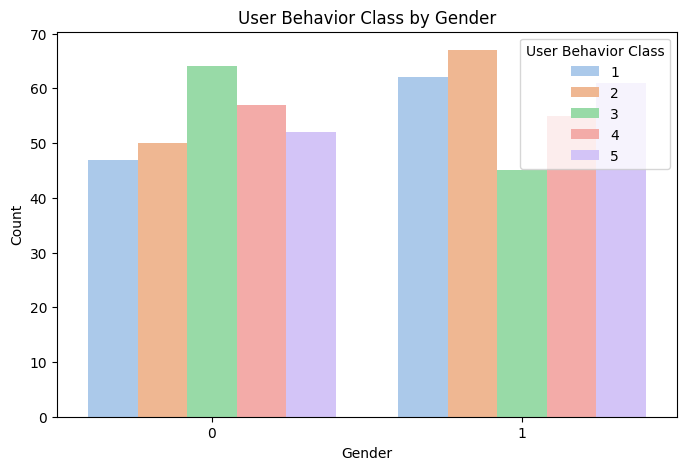

In [105]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', hue=y_train, data=X_train, palette='pastel')
plt.title('User Behavior Class by Gender')
plt.ylabel('Count')
plt.show()

# Device Model vs. User Behavior Class

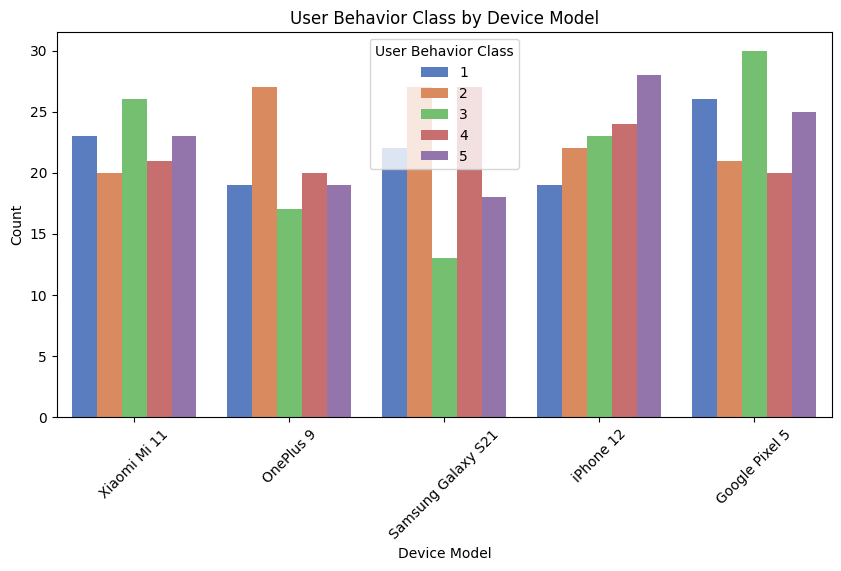

In [106]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Device Model', hue=y_train, data=X_train, palette='muted')
plt.title('User Behavior Class by Device Model')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

## Age Distribution by Behavior Class

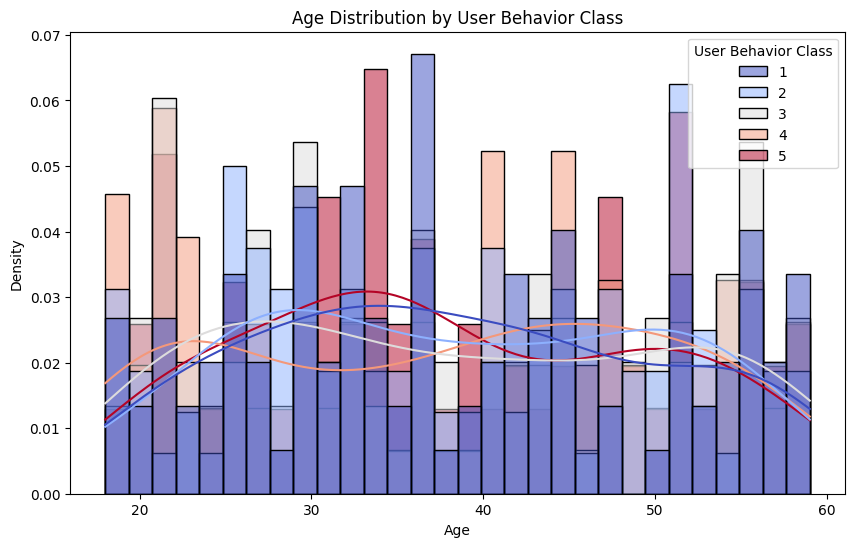

In [107]:
plt.figure(figsize=(10, 6))
sns.histplot(data=X_train, x='Age', hue=y_train, bins=30, kde=True, palette='coolwarm', stat='density', common_norm=False)
plt.title('Age Distribution by User Behavior Class')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

 ## Correlation Heatmap of Numerical Features

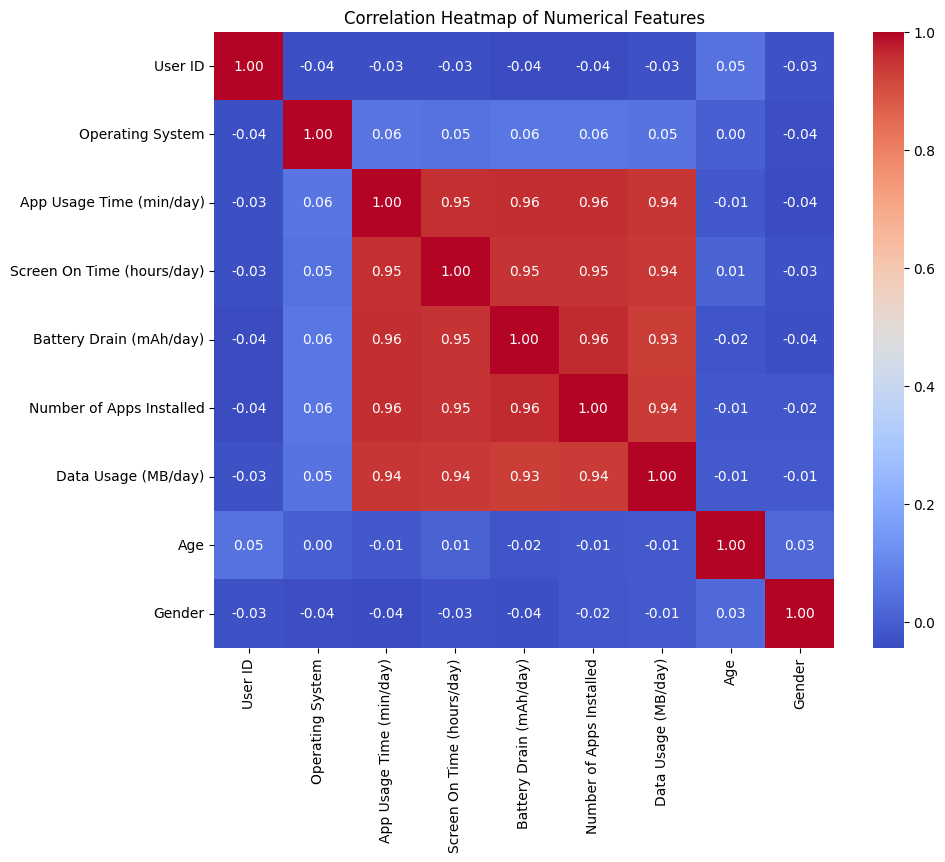

In [108]:
numerical_features = X_train.select_dtypes(include=['int64', 'float64'])
corr_matrix = numerical_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

## Histograms for Continuous Features

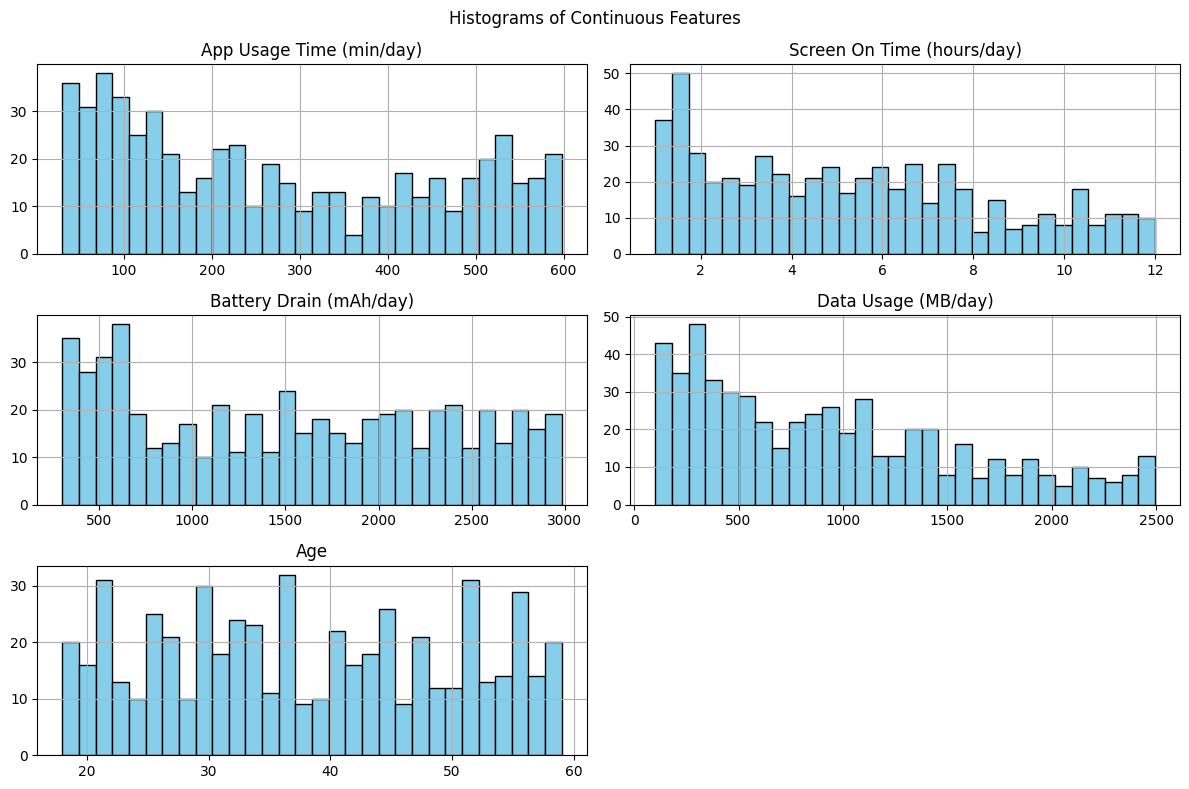

In [109]:
continuous_vars = ['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 'Data Usage (MB/day)', 'Age']
X_train[continuous_vars].hist(bins=30, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Continuous Features')
plt.tight_layout()
plt.show()

## Pairplot for Feature Relationships

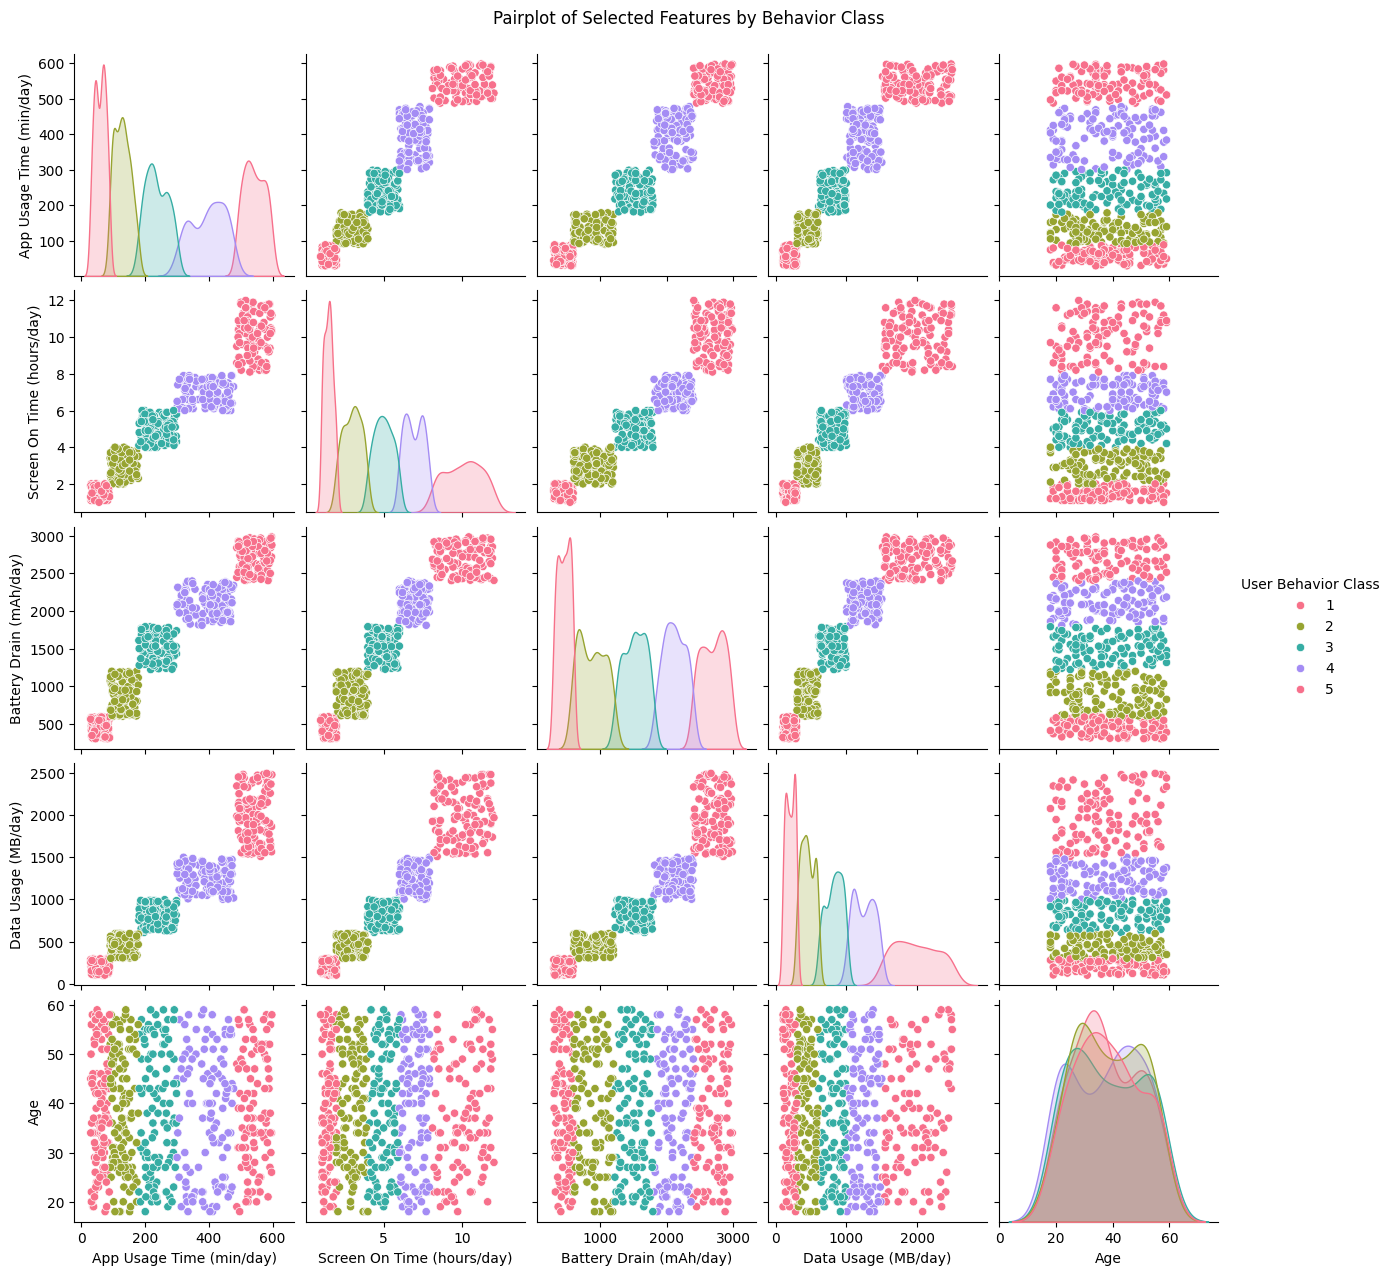

In [110]:
selected_features = ['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)', 'Data Usage (MB/day)', 'Age']
data_with_target = pd.concat([X_train[selected_features], y_train], axis=1)

sns.pairplot(data_with_target, hue='User Behavior Class', palette='husl', height=2.5)
plt.suptitle('Pairplot of Selected Features by Behavior Class', y=1.02)
plt.show()